In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=True)

In [7]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

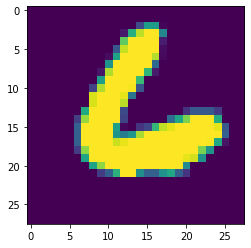

In [60]:
import matplotlib.pyplot as plt
plt.imshow(data[0][5].view(28,28))
plt.show()

In [62]:
import torch.nn as nn
import torch.nn.functional as F

In [71]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [74]:
X = torch.rand((28,28))
# X.head()

In [79]:
X = X.view(1,784)
output = net(X)

In [105]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

In [106]:
for epoch in range(EPOCHS):
    for data in trainset:
    # data is a btach of features and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0118, grad_fn=<NllLossBackward>)
tensor(0.2930, grad_fn=<NllLossBackward>)
tensor(0.0185, grad_fn=<NllLossBackward>)


In [108]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for  idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: " , round(correct/total,3))

Accuracy:  0.98


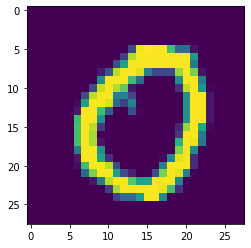

In [119]:
plt.imshow(data[0][1][0])
# its a seven 7

In [120]:
torch.argmax(net(data[0][1][0].view(-1,28*28)))

tensor(0)